## IMPORT

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

## LOAD

In [9]:
pumpkins = pd.read_csv('data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [10]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

## Sort data

### Drop columns with empty features

In [11]:
new_columns = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns],axis=1)
pumpkins.head()

,Package,Date,Low Price,High Price
0,24 inch bins,4/29/17,270.0,280.0
1,24 inch bins,5/6/17,270.0,280.0
2,24 inch bins,9/24/16,160.0,160.0
3,24 inch bins,9/24/16,160.0,160.0
4,24 inch bins,11/5/16,90.0,100.0


### Convert date and arange price

In [12]:
price = (pumpkins['Low Price'] + pumpkins['High Price'] )/ 2
month = pd.DatetimeIndex(pumpkins['Date']).month

new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Price': price })

new_pumpkins.head()
pumpkins = new_pumpkins

### Drop row with Package value not in the same units (we keep those in bushel)

In [13]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()

,Month,Package,Price
70,9,1 1/9 bushel cartons,15.0
71,9,1 1/9 bushel cartons,18.0
72,10,1 1/9 bushel cartons,18.0
73,10,1 1/9 bushel cartons,17.0
74,10,1 1/9 bushel cartons,15.0


### Normalize price to show price per bushel (and remove package column)

In [14]:
#.loc[row_indexer,col_indexer] = value instead
pumpkins.loc[pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price / (1 + 1/9)
pumpkins.loc[pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

pumpkins = pumpkins.drop('Package', axis=1)

pumpkins.head()



/home/rulli/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Month,Price
70,9,13.5
71,9,16.2
72,10,16.2
73,10,15.3
74,10,13.5


## Visualisation

### Not useful graph

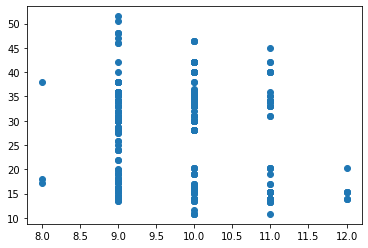

In [18]:
plt.scatter(pumpkins['Month'], pumpkins['Price'])

### Useful graph

Text(0, 0.5, 'Pumpkin Price')

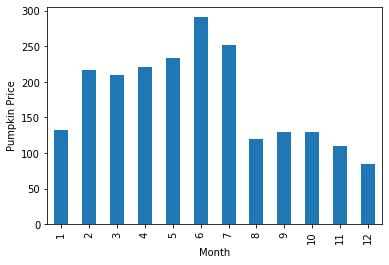

In [19]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")